In [1]:
import numpy
from matplotlib import pyplot,cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def plot2D(x,y,p):
    fig = pyplot.figure(figsize = (11,7),dpi = 100)
    ax = fig.add_subplot(projection = '3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:],rstride = 1,cstride = 1,cmap = cm.viridis,linewidth = 0,antialiased = False)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

> The function`plot2D` takes three arguments, an x-vector, a y-vector and our p matrix. Given these three values, it produces a 3D projection plot, sets the plot limits and gives us a nice viewing angle.

函数 `plot2D` 需要三个参数，一个 X 向量，一个 Y 向量和我们的 P 矩阵。给定这三个值，它产生一个三维投影图，设置绘图限制并给我们一个漂亮的观察角度。

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n + p_{i-1,j}^n) + \Delta x^2 (p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

In [3]:
def laplace2d(p,y,dx,dy,l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = ((dy**2 * (pn[1:-1,2:] + pn[1:-1,0:-2]) 
                        + dx**2 * (pn[2:,1:-1] + pn[0:-2,1:-1]))
                        / (2 * (dx**2 + dy**2)))
        
        p[:,0] = 0 # p = 0 @ x = 0
        p[:,-1] = y # p = y @ x = 2
        p[0,:] =  p[1,:] # dp/dy = 0 @ y = 0
        p[-1,:] = p[-2,:] # dp/dy = 0 @ y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) -  numpy.abs(pn[:]))
                / numpy.sum(numpy.abs(pn[:])))

    return p

> `laplace2d` takes five arguments, the `p` matrix, the `y`-vector, `dx`, `dy` and the value l1norm_target. This last value defines how close the `p` matrix should be in two consecutive iterations before the loop breaks and returns the calculated `p` value.

`laplace2d` 需要五个参数，`p` 矩阵，`y` 向量，`dx`，`dy` 和值l1norm_target。最后一个值定义了在循环中断之前，`p` 矩阵在两个连续的迭代中应该有多接近，并返回计算的 `p` 值。

> Note that when executing the cells above in your own notebook, there will be no output. You have defined the function but you have not yet called the function. It is now available for you to use, the same as `numpy.linspace` or any other function in our namespace.

请注意，在你自己的笔记本中执行上面的单元格时，不会有输出。你已经定义了这个函数，但你还没有调用这个函数。它现在可以供你使用，就像 `numpy.linspace` 或我们命名空间中的任何其他函数一样。

In [4]:
##变量声明
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

##初始条件
p = numpy.zeros((ny, nx)) #创建一个0的XxY向

##绘图辅助工具
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

##边界条件
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

> Now let's try using our plot2D function to look at our initial conditions. If the function has been correctly defined, you should be able to begin typing plot2D and hit the tab key for auto-complete options.

现在，让我们试着用我们的 `plot2D` 函数来看看我们的初始条件。如果函数已经被正确定义，你应该能够开始输入 `plot2D`，并点击tab键进行自动完成选项。

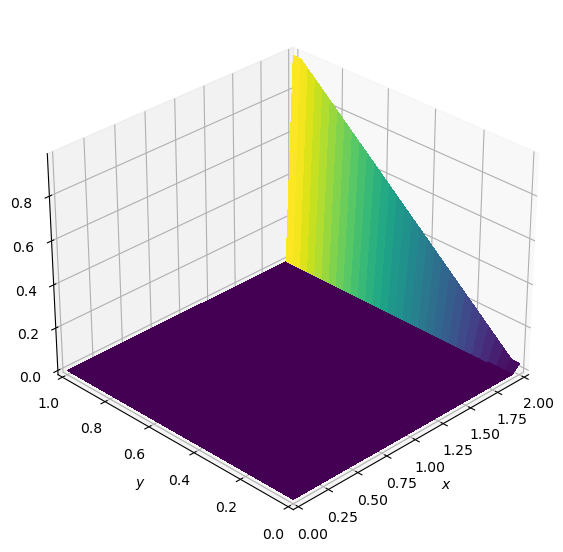

In [5]:
plot2D(x, y, p)

> It worked! This is the initial state of our problem, where the value of `p` is zero everywhere except for along $x = 2$ where $p = y$. Now let's try to run our `laplace2d` function with a specified L1 target of .01

它成功了! 这是我们问题的初始状态，除了沿 $x=2$ 处 $p=y$，其他地方的 `p` 值都是零。现在让我们尝试运行我们的 `laplace2d` 函数，指定L1目标为0.01

[Hint: if you are having trouble remembering the order in which variables are sent to a function, you can just type `laplace2d(` and the iPython Notebook will put up a little popup box to remind you]

[提示：如果你很难记住变量发送到函数的顺序，你可以直接输入`laplace2d(`，iPython笔记本会弹出一个小框来提醒你。］

In [6]:
p = laplace2d(p, y, dx, dy, 1e-4)

> Now try plotting this new value of `p` with our plot function.

现在试着用我们的绘图函数来绘制这个新的 `p` 值。

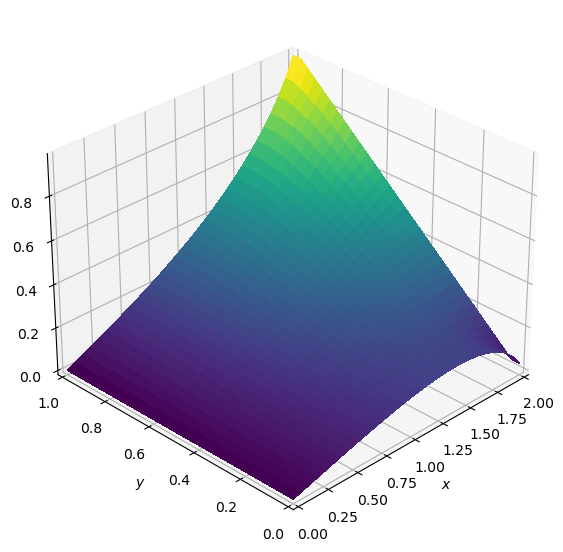

In [7]:
plot2D(x, y, p)